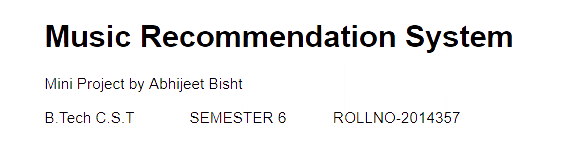

In [1]:
from IPython.display import Image
Image("intro.png")


In [60]:
!pip install matplotlib

In [61]:
!pip install seaborn

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import numpy as np
import pandas as pd

In [64]:
#Phase 1 Importing Dataset
songs=pd.read_csv('tcc_ceds_music.csv')
songs.head(2)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.13711,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.26324,world/life,1.0


In [8]:
#classify useful fields like
#artist_name #track_name #genre #topic #age #lyrics #music #release_date

In [9]:
songs=songs[['artist_name','track_name','genre','topic','age','music','release_date']]
songs.head(6)

,artist_name,track_name,genre,topic,age,music,release_date
0,mukesh,mohabbat bhi jhoothi,pop,sadness,1.0,0.039288,1950
1,frankie laine,i believe,pop,world/life,1.0,0.118034,1950
2,johnnie ray,cry,pop,music,1.0,0.323794,1950
3,pérez prado,patricia,pop,romantic,1.0,0.001548,1950
4,giorgos papadopoulos,apopse eida oneiro,pop,romantic,1.0,0.001350,1950
5,perry como,round and round (with mitchell ayres and his o...,pop,violence,1.0,0.001053,1950


In [10]:
songs['genre'].value_counts()
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_name   28372 non-null  object 
 1   track_name    28372 non-null  object 
 2   genre         28372 non-null  object 
 3   topic         28372 non-null  object 
 4   age           28372 non-null  float64
 5   music         28372 non-null  float64
 6   release_date  28372 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ MB


<AxesSubplot:>

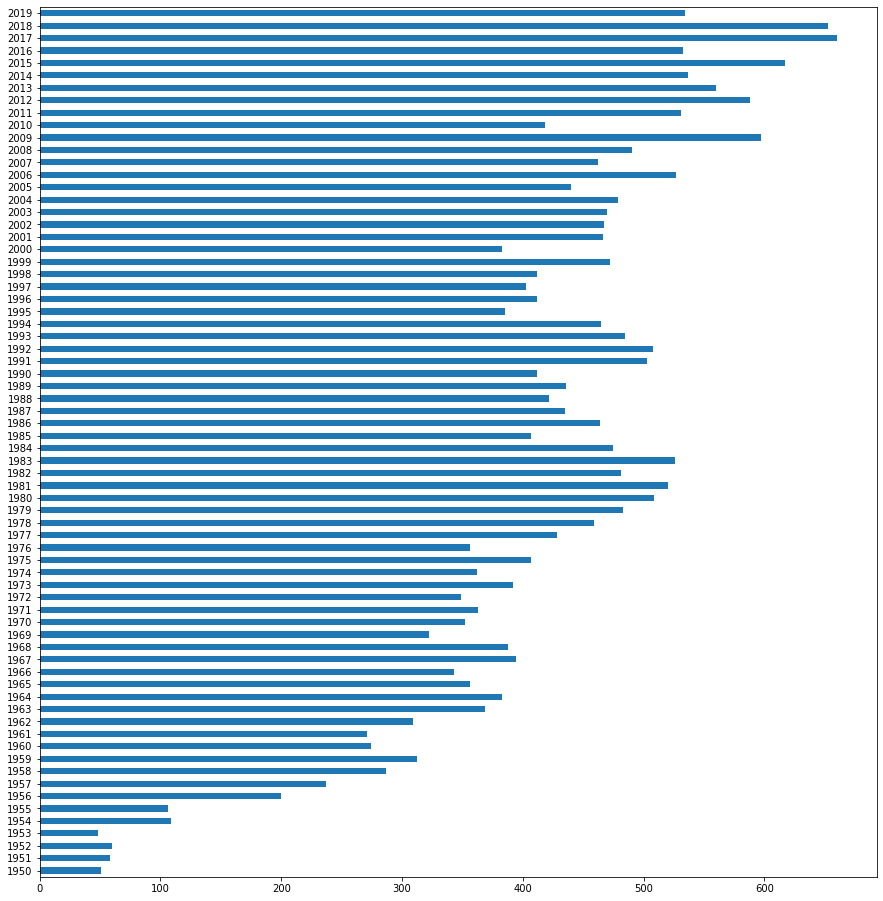

In [11]:
songs.release_date.value_counts().sort_index().plot(kind='barh',figsize=(15,16))

In [12]:
songs.iloc[23].genre

'pop'

In [13]:
songs.isnull().sum()

artist_name     0
track_name      0
genre           0
topic           0
age             0
music           0
release_date    0
dtype: int64

In [14]:
songs.duplicated().sum()

0

In [15]:
#ALternative correction of Data
#import ast
#ast.literal_eval
#songs.head(1)

#songs['track_name']= songs['track_name'].apply(lambda x:[i.replace(" ","") for i in x])
#songs['artist_name']= songs['artist_name'].apply(lambda x:[i.replace(" ","") for i in x])



In [38]:
songs['necessary'] = songs['genre'] + " " + songs['topic']


In [39]:
 songs.head(1)

,artist_name,track_name,genre,topic,age,music,release_date,tags,necessary
0,mukesh,mohabbat bhi jhoothi,pop,sadness,1.0,0.039288,1950,pop sadness,pop sadness


In [40]:
new_df= songs[['artist_name','track_name','genre','topic','necessary']]
new_df.head(7)


,artist_name,track_name,genre,topic,necessary
0,mukesh,mohabbat bhi jhoothi,pop,sadness,pop sadness
1,frankie laine,i believe,pop,world/life,pop world/life
2,johnnie ray,cry,pop,music,pop music
3,pérez prado,patricia,pop,romantic,pop romantic
4,giorgos papadopoulos,apopse eida oneiro,pop,romantic,pop romantic
5,perry como,round and round (with mitchell ayres and his o...,pop,violence,pop violence
6,freestyle,opm medley: when i met you,pop,world/life,pop world/life


In [41]:
necessary=new_df['necessary'].apply(lambda x:" ".join(x))
new_df.head()

,artist_name,track_name,genre,topic,necessary
0,mukesh,mohabbat bhi jhoothi,pop,sadness,pop sadness
1,frankie laine,i believe,pop,world/life,pop world/life
2,johnnie ray,cry,pop,music,pop music
3,pérez prado,patricia,pop,romantic,pop romantic
4,giorgos papadopoulos,apopse eida oneiro,pop,romantic,pop romantic


In [20]:
songs.head()

,artist_name,track_name,genre,topic,age,music,release_date,tags
0,mukesh,mohabbat bhi jhoothi,pop,sadness,1.0,0.039288,1950,pop sadness
1,frankie laine,i believe,pop,world/life,1.0,0.118034,1950,pop world/life
2,johnnie ray,cry,pop,music,1.0,0.323794,1950,pop music
3,pérez prado,patricia,pop,romantic,1.0,0.001548,1950,pop romantic
4,giorgos papadopoulos,apopse eida oneiro,pop,romantic,1.0,0.001350,1950,pop romantic


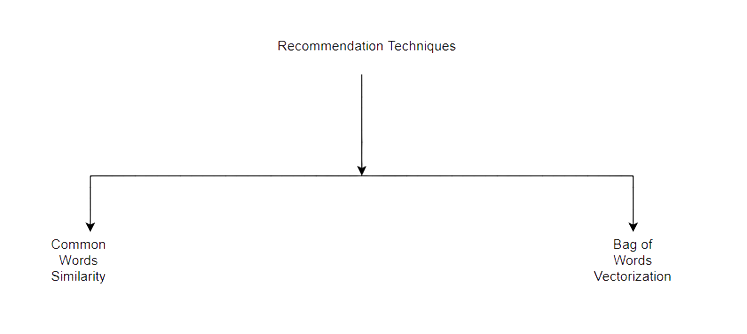

In [21]:
from IPython.display import Image
Image("typesofrec.png")

In [22]:
#MAIN PHASE VECTORISATION
#Technique Used is Bag of Words


In [23]:
!pip install sklearn

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


In [42]:
storevector= CountVectorizer(max_features=2000)
vectors=storevector.fit_transform(new_df['necessary']).toarray()



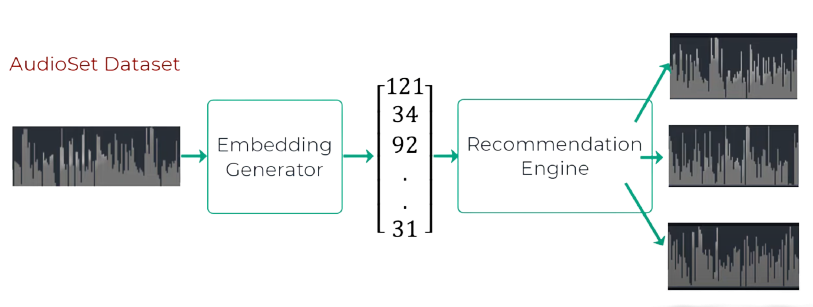

In [43]:
from IPython.display import Image
Image("vectorisation.png")

In [45]:
storevector.get_feature_names()

['blues',
 'country',
 'feelings',
 'hip',
 'hop',
 'jazz',
 'life',
 'music',
 'night',
 'obscene',
 'pop',
 'reggae',
 'rock',
 'romantic',
 'sadness',
 'time',
 'violence',
 'world']

In [46]:
#Cosine distance between vectors
from sklearn.metrics.pairwise import cosine_similarity


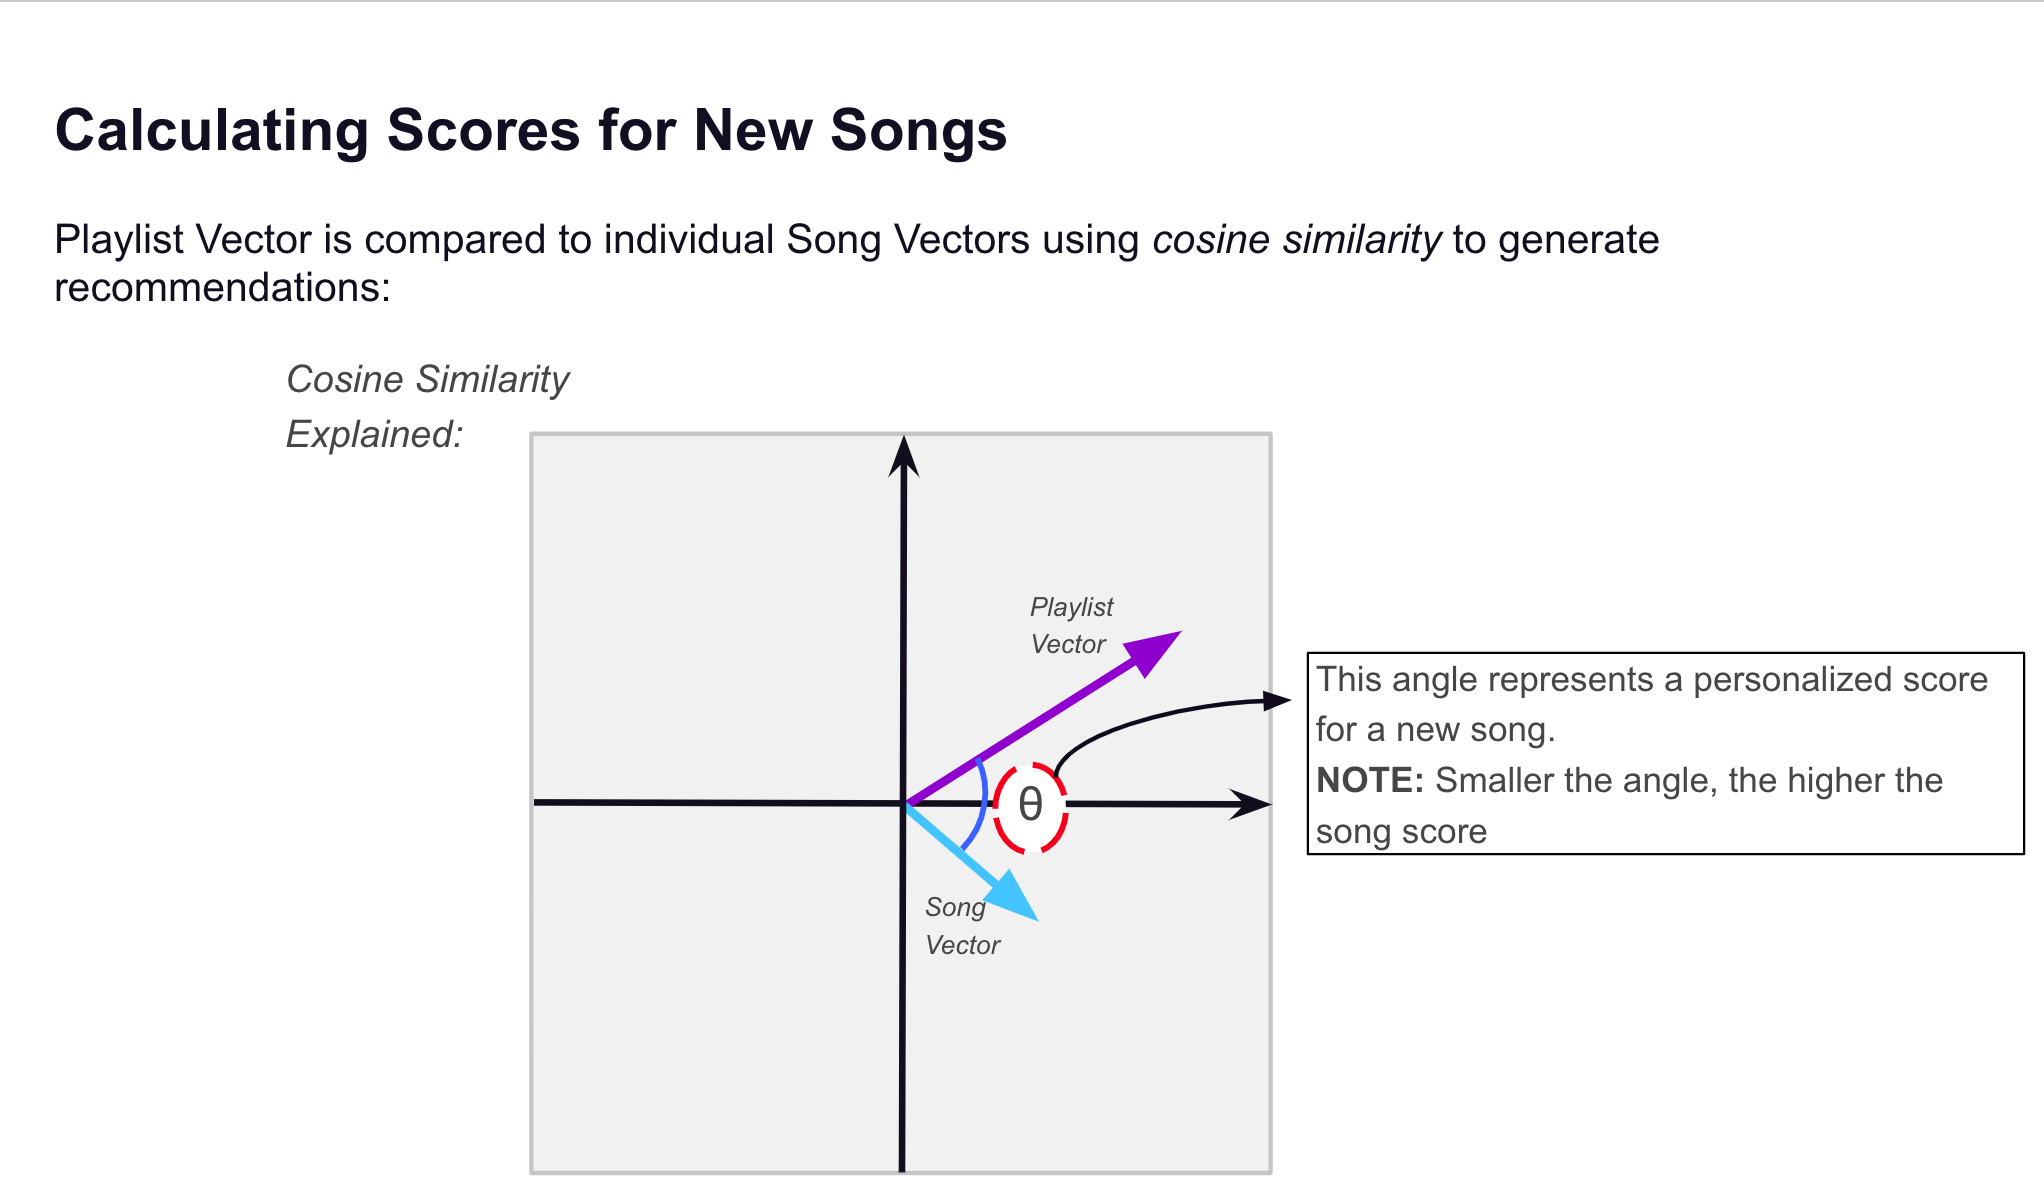

In [47]:
from IPython.display import Image
Image("download.png")

In [48]:
samesongs = cosine_similarity(vectors)

In [49]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
a=sorted(list(enumerate(samesongs[0])),reverse=True,key=lambda x:x[1])[1:11]

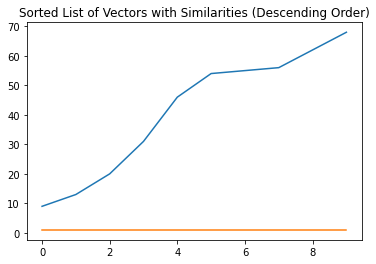

In [51]:
plt.title('Sorted List of Vectors with Similarities (Descending Order)');
plt.plot(a)


In [52]:
samesongs[1]


array([0.40824829, 1.        , 0.40824829, ..., 0.        , 0.        ,
       0.        ])

In [57]:
def recommend(song):
  song_index=new_df[new_df['track_name'] == song].index[0]
  distances = samesongs[song_index]
  song_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]

  for i in song_list:
    print(new_df.iloc[i[0]].track_name)


In [66]:
recommend('brazil')


opm medley: when i met you
it's not for me to say
chicken reel
judai ki khabar hoti agar
raat andheri door savera
thunintha pin
ethanai periya
chandan ka palna resham ko dori
viljen i veta (would you like to know?)
brazil
